# Projectile Motion

> Projectile motion is a form of motion experienced by an object or particle (a projectile) that is projected in a gravitational field, such as from Earth's surface, and moves along a curved path under the action of gravity only. 
>-- <cite>[wikipedia](https://en.wikipedia.org/wiki/Projectile_motion)</cite>

The projectile path of a point like object with mass `m` can be determine by Newton's laws of motion.
$$
    a_x = \frac{d^2 x}{dt^2} = 0 \\
    a_y = \frac{d^2 y}{dt^2} = -g 
$$

First let determine the projectile path by only numerial methods (without sympy). Let import essential python libraries.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

Let define the constants and inital values.

In [85]:
G = 9.81  # gravitational acceleration (m/s^2)
v0 = 70  # initial velocity (m/s)
r0 = 0  # inital displacement (m)
alpha = np.deg2rad(60)  # initial angle relative to positive x direction
h = 0.1  # step size in time

t = np.arange(0, 5, h)  # define time range as a discreate array
# v_x = np.zeros(t.shape[0])  # define velocity array to store velocity in x direction for each time step
# v_y = np.zeros(t.shape[0])  # define velocity array to store velocity in y direction for each time step
# v_x[0], v_y[0] = v0 * np.cos(alpha), v0 * np.sin(alpha)  # inital velocity in x an y positive direction
x = np.zeros(t.shape[0])  # define displacemnt array to store displacement in x direction for each time step
y = np.zeros(t.shape[0])  # define displacemnt array to store displacement in x direction for each time step

Now define python functions for accelerations in x and y positive directions. In these functions paramitter ```t``` is defined because only for the sake of completeness even it is unused.

In [86]:
def a_x(t):
    return 0


def a_y(t):
    return -G

Now let find velocity in x and y direction seperately by using second order Runge-Kutta method.

In [87]:
def runge_kutta2(h, f, y0, x):
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(t.shape[0] - 1):
        k1 = h * f(x[i])
        k2 = h * f(x[i + 1])
        y[i + 1] = y[i] + (k1 + k2) / 2
    return y


v_x = runge_kutta2(h, a_x, v0 * np.cos(alpha), t)
v_y = runge_kutta2(h, a_y, v0 * np.sin(alpha), t)

Let's plot the velocity vs time.

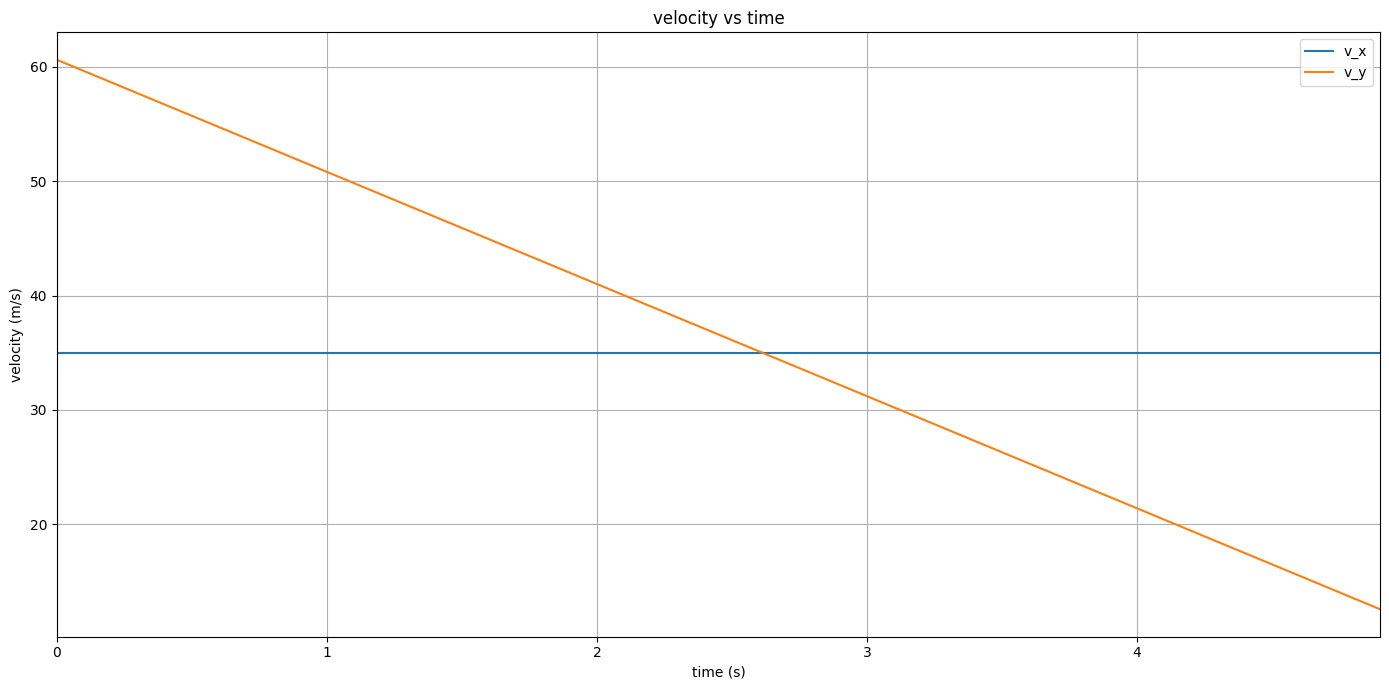

In [88]:
plt.figure(figsize=(14, 7))
plt.plot(t, v_x, label="v_x")
plt.xlim((0, t[-1]))
plt.xlabel("time (s)")
plt.plot(t, v_y, label="v_y")
plt.ylabel("velocity (m/s)")
plt.title("velocity vs time")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()